# 密度聚类标记异常共享单车


In [2]:
# 导入数据，lat是latitude的缩写，表示纬度；lon是longitude的缩写，表示经度
import pandas as pd
import numpy as np

df = pd.read_csv("challenge-9-bike.csv")
df.head()

,lat,lon
0,39.895755,116.494320
1,39.908639,116.487139
2,39.896444,116.445501
3,39.921834,116.454745
4,39.907350,116.487374


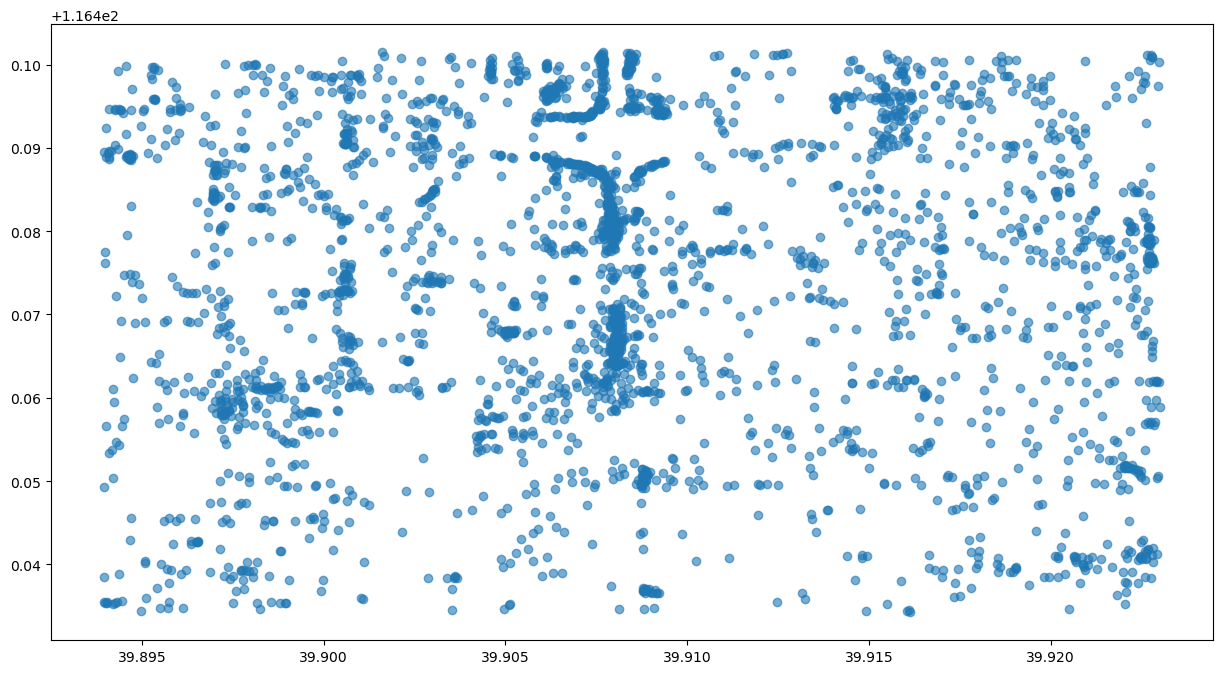

In [3]:
# 绘制分布图
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(15, 8))
plt.scatter(df["lat"], df["lon"], alpha=0.6)

In [6]:
# Exercise 30.1
# 使用 DBSCAN 算法完成共享单车 GPS 散点数据密度聚类，需要确定 eps 和 min_samples 参数
from sklearn.cluster import DBSCAN

### 代码开始 ### (≈ 2 行代码)
dbscan_m = DBSCAN(eps=0.001, min_samples=10)
dbscan_c = dbscan_m.fit_predict(df)
### 代码结束 ###
dbscan_c

array([ 0,  1, -1, ...,  2, 12, 12])

<Figure size 1500x800 with 0 Axes>

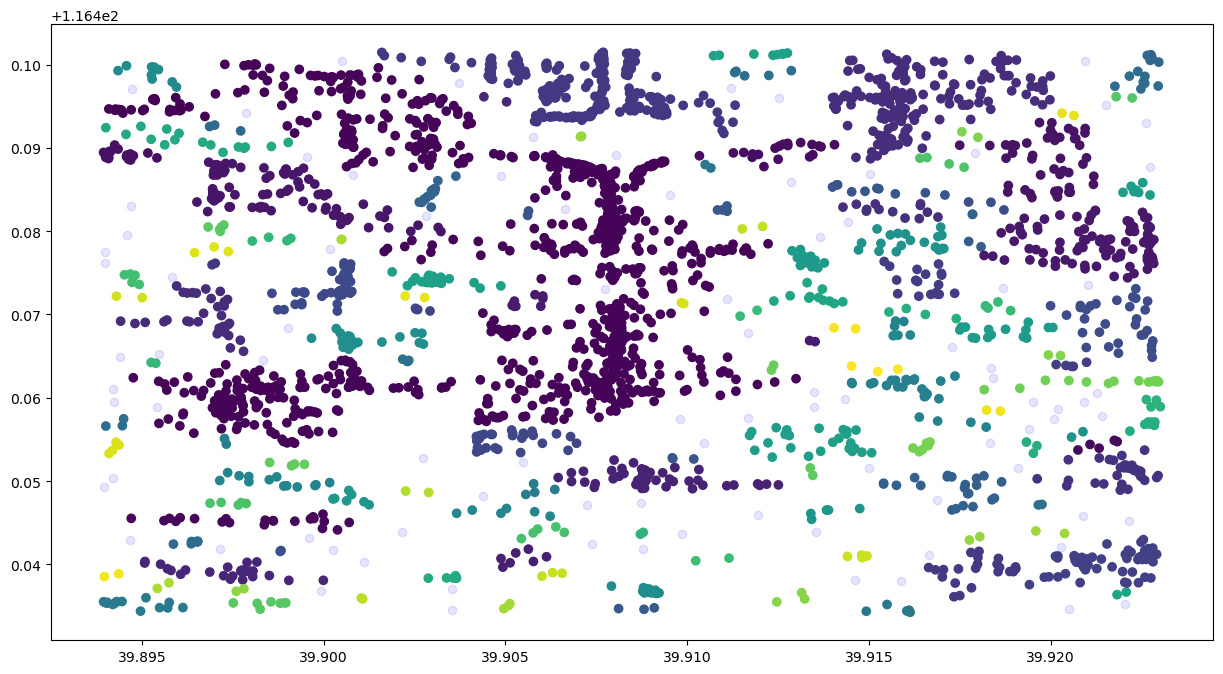

: 

In [ ]:
# Exercise 30.2
# 针对上面聚类后数据，按要求重新绘制散点图
# 未被聚类的异常点以 alpha=0.1 蓝色数据点呈现，聚类数据按类别呈现且设置 cmap='viridis'
plt.figure(figsize=(15, 8))
# DBSCAN将所有的噪音点打上了-1的标签
df_c = pd.concat([df, pd.DataFrame(dbscan_c, columns=['clusters'])], axis=1)

# 挑出有用点和噪音点
df_n = df_c[df_c['clusters']!=-1]
df_o = df_c[df_c['clusters']==-1]

plt.figure(figsize=(15,8))
plt.scatter(df_n['lat'], df_n['lon'], c=df_n['clusters'], cmap='viridis')
plt.scatter(df_o['lat'], df_o['lon'], alpha=.1, c='b')

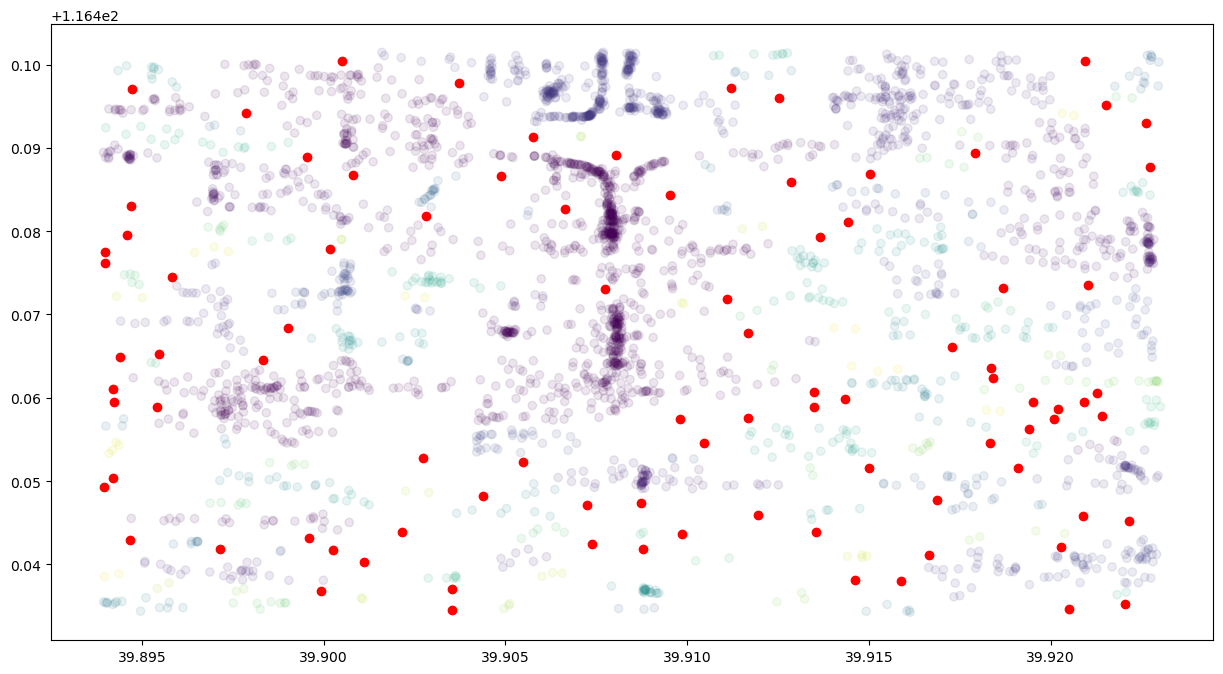

In [ ]:
# Exercise 30.3
# 针对聚类后数据，将异常点（不符合半径 100 米内有 2 辆共享单车）绘制到散点图
# 未被聚类的边界点以红色数据点呈现，聚类数据按类别呈现且设置 alpha=0.1，cmap='viridis'
plt.figure(figsize=(15,8))

dbscan_m = DBSCAN(eps=0.001, min_samples=2)
dbscan_c = dbscan_m.fit_predict(df)
dbscan_c

df_c = pd.concat([df, pd.DataFrame(dbscan_c, columns=['clusters'])], axis=1)

df_n = df_c[df_c['clusters']!=-1]
df_o = df_c[df_c['clusters']==-1]

plt.scatter(df_n['lat'], df_n['lon'], c=df_n['clusters'], cmap='viridis', alpha=.1)
plt.scatter(df_o['lat'], df_o['lon'], c='r')